In [1]:
#Below you can see the important packages I have used in this assessment.

import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
variable = pd.read_csv('/Users/MatthewWaters/Downloads/outcomes.csv')

# Evidence of importing a csv file.

<span style="font-size:20px;">Data Overview</span>

In [3]:
variable.info()

# Here an information overview of my dataset can be seen.
# The Data type for 'home_score' and 'away_score' is an integer.
# The Data type for 'neutral' is a Boolean.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41586 entries, 0 to 41585
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41586 non-null  object
 1   home_team   41586 non-null  object
 2   away_team   41586 non-null  object
 3   home_score  41586 non-null  int64 
 4   away_score  41586 non-null  int64 
 5   tournament  41586 non-null  object
 6   city        41586 non-null  object
 7   country     41586 non-null  object
 8   neutral     41586 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [4]:
variable.head()

# The first five rows of my dataset.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
variable.tail()

# The last five rows of my dataset.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True
41585,2020-02-01,United States,Costa Rica,1,0,Friendly,Carson,United States,False


In [6]:
variable.sample(5)

#A random sample of five rows from my dataset.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40861,2019-06-24,Ecuador,Japan,1,1,Copa América,Belo Horizonte,Brazil,True
19397,1996-02-10,Australia,Japan,1,4,Friendly,Wollongong,Australia,False
9422,1975-08-05,Vanuatu,Tahiti,0,3,South Pacific Games,Tamuning,Guam,True
38329,2016-10-08,Armenia,Romania,0,5,FIFA World Cup qualification,Yerevan,Armenia,False
18760,1995-03-15,Poland,Lithuania,4,1,Friendly,Ostrowiec Świętokrzyski,Poland,False


In [7]:
variable.shape

# There are 41586 entries and 9 columns in my DataSet.

(41586, 9)

In [8]:
variable.columns

# Below is a description of the column names in my dataset;
   # date: This shows the day, month and year the match was played.
   # home_team: This shows the home team for the match.
   # away_team: This shows the away team for the match.
   # home_score: This provides a total of the goals scored by the home team.
   # away_score: This provides a total of the goals scored by the away team.
   # tournament: This shows the competition or tournament the match was played in.
   # city: This shows the city the match was played in.
   # country: This shows the country the match was played in.
   # neutral: Shows if the game was played in a neutral venue or not, meaning no team would've had an advantage.

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [9]:
variable.describe()

# Compare the number of goals scored by home and away teams.
   # HOME: The least amount of goals scored by a home team was 0. (min)
         # The most amount of goals scored by a home team was 31. (max)
         # The average number of goals scored by a home team was 1.745756. (mean)
        
   # AWAY: The least amount of goals scored by an away team was 0. (min)
         # The most amount of goals scored by an away team was 21. (max)
         # The average number of goals scored by an away team was 1.187587. (mean)

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [10]:
variable.duplicated().sum()

#There are no duplicates in this dataset.

0

In [11]:
variable.isnull()

#There are no missing values in this dataset.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
41581,False,False,False,False,False,False,False,False,False
41582,False,False,False,False,False,False,False,False,False
41583,False,False,False,False,False,False,False,False,False
41584,False,False,False,False,False,False,False,False,False


In [12]:
variable.isnull().sum()

# Confirmation that there are no missing values to replace in this dataset.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

<span style="font-size:20px;">Data Manipulation</span>

In [13]:
results_variable = variable.copy()

#Copy of my dataset.

In [14]:
variable['date'] = pd.to_datetime(variable['date'])

#Changed the date column in my dataSet to DateTime using Pandas 'datetime' function.

In [15]:
variable.dtypes

#Checking the data types again to see if the change was successful.

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [16]:
results_variable = results_variable.rename(columns={"tournament":"competition"})

#Changing column name tournament to competition.

In [17]:
results_variable['competition'].head()

#Evidence of successful column name change.

0    Friendly
1    Friendly
2    Friendly
3    Friendly
4    Friendly
Name: competition, dtype: object

In [18]:
results_variable_sorted = results_variable.sort_values('competition')
print(results_variable_sorted.head(5))

# Evidence of sorting alphabetically by competition name.

             date home_team away_team  home_score  away_score  \
35644  2013-11-14   Curaçao     Aruba           2           0   
33768  2011-12-04  Suriname   Curaçao           2           0   
33756  2011-12-02   Curaçao   Bonaire           1           3   
36708  2015-01-30   Curaçao     Aruba           0           0   
35643  2013-11-14   Bonaire  Suriname           0           2   

           competition        city   country  neutral  
35644  ABCS Tournament  Willemstad   Curaçao    False  
33768  ABCS Tournament  Paramaribo  Suriname    False  
33756  ABCS Tournament  Paramaribo  Suriname     True  
36708  ABCS Tournament  Paramaribo  Suriname     True  
35643  ABCS Tournament  Willemstad   Curaçao     True  


In [19]:
column_display = ['competition', 'date', 'home_team', 'away_team']
results_variable_sorted = results_variable_sorted[column_display]

results_variable_sorted = results_variable_sorted.sample(10).sort_values('competition')

print(results_variable_sorted)

#Shows a random sample of only four columns sorted alphabetically by competition name.

                        competition        date       home_team      away_team
8233        Brazil Independence Cup  1972-06-29        Scotland     Yugoslavia
46             British Championship  1886-03-29           Wales        England
14233                FIFA World Cup  1986-06-13         Denmark        Germany
12266                FIFA World Cup  1982-06-15         Hungary    El Salvador
8294   FIFA World Cup qualification  1972-08-20          Canada  United States
41211                      Friendly  2019-10-10           Gabon   Burkina Faso
38004                      Friendly  2016-06-05  Czech Republic    South Korea
39579                      Friendly  2018-03-22         Bahrain      Palestine
11380                     Korea Cup  1980-09-02     South Korea      Indonesia
1820            Nordic Championship  1935-09-22          Norway         Sweden


In [20]:
team_goals = {}
for index, row in results_variable.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']
    
    if home_team in team_goals:
        team_goals[home_team] += home_score
    else:
        team_goals[home_team] = home_score
    if away_team in team_goals:
        team_goals[away_team] += away_score
    else:
        team_goals[away_team] = away_score

for team, goals in team_goals.items():
    print(f"{team}: {goals} goals")
    
#Function that shows the total goals scored by every country and maintains a dictionary.    

Scotland: 1352 goals
England: 2208 goals
Wales: 822 goals
Northern Ireland: 674 goals
United States: 994 goals
Canada: 441 goals
Uruguay: 1391 goals
Argentina: 1830 goals
Austria: 1382 goals
Hungary: 1886 goals
Czechoslovakia: 915 goals
Belgium: 1356 goals
France: 1493 goals
Switzerland: 1164 goals
Netherlands: 1618 goals
Germany: 2124 goals
Sweden: 2015 goals
Norway: 1209 goals
Italy: 1369 goals
Chile: 1081 goals
Finland: 874 goals
Luxembourg: 244 goals
Catalonia: 73 goals
Russia: 1199 goals
Denmark: 1416 goals
Brazil: 2149 goals
Basque Country: 154 goals
Japan: 1105 goals
Philippines: 275 goals
Paraguay: 942 goals
Estonia: 470 goals
Provence: 38 goals
Costa Rica: 985 goals
El Salvador: 613 goals
Guatemala: 606 goals
Yugoslavia: 940 goals
Poland: 1371 goals
Spain: 1400 goals
Portugal: 1032 goals
Brittany: 18 goals
Romania: 1135 goals
New Zealand: 619 goals
Australia: 1046 goals
Latvia: 472 goals
Galicia: 18 goals
Central Spain: 2 goals
Mexico: 1514 goals
Andalusia: 25 goals
Asturias: 

In [21]:
print(variable.index)

RangeIndex(start=0, stop=41586, step=1)


In [22]:
row_example = variable.loc[50]
print(row_example)

#Indexing to access the 50th row of my DataSet.

date           1887-02-19 00:00:00
home_team                 Scotland
away_team         Northern Ireland
home_score                       4
away_score                       1
tournament    British Championship
city                       Glasgow
country                   Scotland
neutral                      False
Name: 50, dtype: object


In [23]:
row_position = variable.iloc[700]
print(row_position)

#Indexing by position to get the 700th row of my DataSet.

date          1923-04-02 00:00:00
home_team             Netherlands
away_team                  France
home_score                      8
away_score                      1
tournament               Friendly
city                    Amsterdam
country               Netherlands
neutral                     False
Name: 700, dtype: object


<span style="font-size:20px;">Total Goals v Total Matches (YoY Analysis)</span>


In [24]:
all_matches = variable.groupby(variable['date'].dt.year)['date'].count()
print(all_matches)

#Calculation of total matches played in a year using grouping.

date
1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2016     926
2017     958
2018     905
2019    1155
2020       7
Name: date, Length: 149, dtype: int64


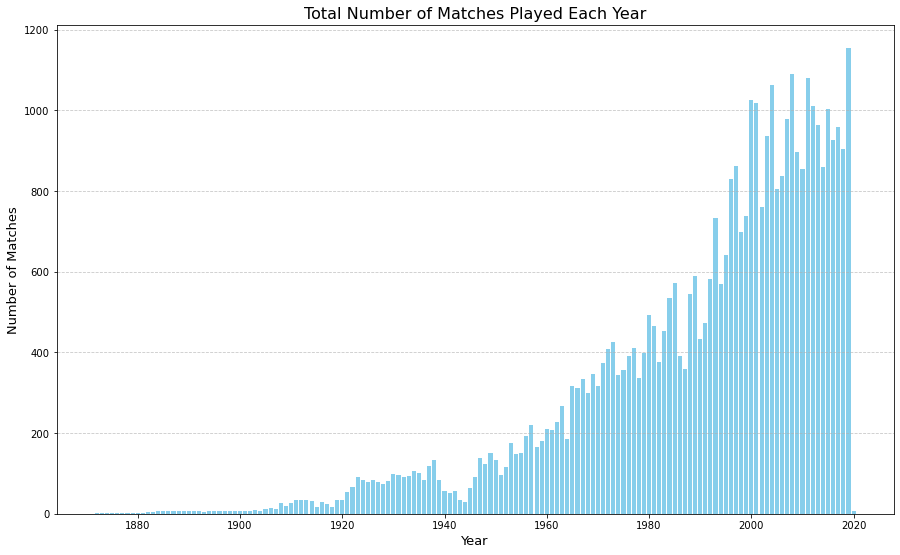

In [25]:
#What were the total number of matches played each year?
#GRAPH ONE:

plt.figure(figsize=(15, 9))  
plt.bar(all_matches.index, all_matches.values, color='skyblue')
plt.title('Total Number of Matches Played Each Year', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Matches', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#A significant increase in the number of matches can be seen over the course of my DataSet.

<Figure size 864x504 with 0 Axes>

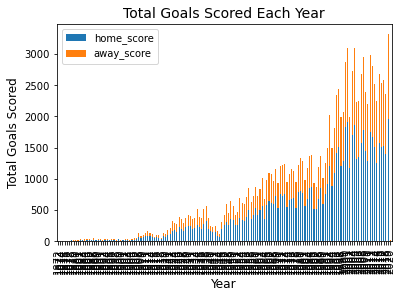

In [26]:
#What was the total number of goals (home and away) scored each year?
#GRAPH TWO:

all_goals = variable.groupby(variable['date'].dt.year)[['home_score', 'away_score']].sum()
plt.figure(figsize=(12, 7))
all_goals.plot(kind='bar', stacked=True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Goals Scored', fontsize=12)
plt.title('Total Goals Scored Each Year', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#The number of goals scored saw an increase over the years of my dataset too.
#You can see a strong corrulation between the number of matches above and goals scored here.
#Home goals are blue and away goals are orange, can see there were more home goals scored.

<span style="font-size:20px;">Average Goals Scored Analysis</span>

In [27]:
def calculate_average_goals(variable, team):
    home_goals = variable[variable['home_team'] == team]['home_score'].mean()
    away_goals = variable[variable['away_team'] == team]['away_score'].mean()
    total_goals = (home_goals + away_goals) / 2
    return total_goals

average_goal = calculate_average_goals(variable, 'Serbia')
print(average_goal)

#Function to track a teams average goals scored over the whole DataSet.
#Can use this function to track every individual team in the DataSet, here I choose Serbia.

1.5914089538908116


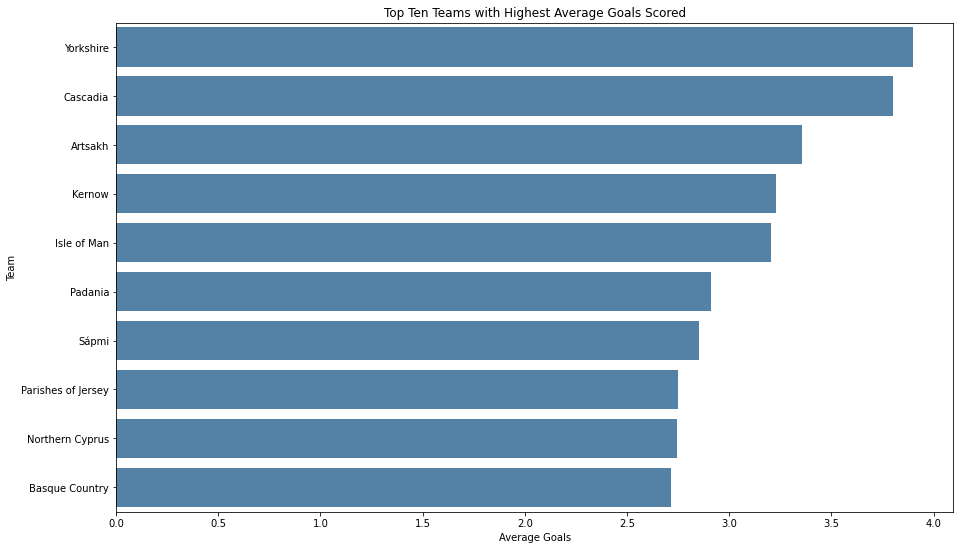

In [28]:
#Which teams on average scored the most goals?
#GRAPH THREE:

team_avg_goals = pd.DataFrame({'team': variable['home_team'].unique()})
team_avg_goals['average_goals'] = team_avg_goals['team'].apply(lambda x: calculate_average_goals(variable, x))
team_avg_goals_sorted = team_avg_goals.sort_values(by='average_goals', ascending=False).head(10)
plt.figure(figsize=(15, 9))
sns.barplot(x='average_goals', y='team', data=team_avg_goals_sorted, color='steelblue')
plt.xlabel('Average Goals')
plt.ylabel('Team')
plt.title('Top Ten Teams with Highest Average Goals Scored')
plt.show()

#Interesting to see no countries of note nowadays arose here.
#These countries generally had higher averages due to playing significantly less games than other teams.

ANALYSIS TO DETERMINE THE MOST SUCCESSFUL TEAMS

In [29]:
def calculate_total_games(variable, team_names):
    total_games = []
    for team_name in team_names:
        team_matches = variable[(variable['home_team'] == team_name) | (variable['away_team'] == team_name)]
        games_played = len(team_matches)
        total_games.append((team_name, games_played))
    return total_games

team_names = ['Yorkshire', 'Cascadia', 'Artsakh', 'Kernow', 'Isle of Man', 'Padania']
total_games = calculate_total_games(variable, team_names)
print(total_games)

#Function to determine the total games played by teams over the entire DataSet.
#We can see the top four teams in terms of average goals scored played eleven or less games. 

[('Yorkshire', 7), ('Cascadia', 7), ('Artsakh', 11), ('Kernow', 11), ('Isle of Man', 49), ('Padania', 43)]


In [30]:
def calculate_total_wins(variable, team):
    home_wins = variable[(variable['home_team'] == team) & (variable['home_score'] > variable['away_score'])]
    away_wins = variable[(variable['away_team'] == team) & (variable['away_score'] > variable['home_score'])]
    total_wins = len(home_wins) + len(away_wins)
    return total_wins
team_name = 'Sweden'
total_wins = calculate_total_wins(variable, team_name)
print(total_wins)

#Function to determine the total wins of a team in my DataSet.
#Can be used to track any individual team in the Dataset.

500


In [31]:
def find_teams_with_most_wins(variable, num_teams):
    teams = variable['home_team'].unique()
    team_wins = []

    for team in teams:
        total_wins = calculate_total_wins(variable, team)
        team_wins.append((team, total_wins))
    team_wins.sort(key=lambda x: x[1], reverse=True)
    
    print(f"Teams with the most wins:")
    for i in range(num_teams):
        team_name, total_wins = team_wins[i]
        print(f"{i+1}. {team_name}: {total_wins} wins")
        
num_teams = 10 
find_teams_with_most_wins(variable, num_teams)

#Function to determine the top 10 teams with the most wins in my DataSet.
#The ten teams who accumulated the most total wins can be seen below.

Teams with the most wins:
1. Brazil: 625 wins
2. England: 572 wins
3. Germany: 555 wins
4. Argentina: 526 wins
5. Sweden: 500 wins
6. South Korea: 454 wins
7. Mexico: 439 wins
8. Hungary: 434 wins
9. Italy: 423 wins
10. France: 417 wins


In [32]:
team_names = ['Brazil', 'England', 'Germany', 'Argentina', 'Sweden', 'South Korea', 'Mexico', 'Hungary', 'Italy', 'France']
total_games = calculate_total_games(variable, team_names)
print(total_games)

#Noting that the teams with the most wins have also played a substantial number of games.

[('Brazil', 981), ('England', 1009), ('Germany', 949), ('Argentina', 980), ('Sweden', 1018), ('South Korea', 862), ('Mexico', 869), ('Hungary', 928), ('Italy', 800), ('France', 840)]


<span style="font-size:20px;">Creating a new column & Dealing with Missing Values</span>

In [33]:
variable['winners'] = np.nan
variable.loc[variable['home_score'] > variable['away_score'], 'winners'] = variable['home_team']
variable.loc[variable['away_score'] > variable['home_score'], 'winners'] = variable['away_team']
print(variable.head())

#Creating a new column 'winners' to assist in further analysis.

        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral   winners  
0  Scotland    False       NaN  
1   England    False   England  
2  Scotland    False  Scotland  
3   England    False       NaN  
4  Scotland    False  Scotland  


In [34]:
variable.isnull().sum()

#Could see missing values with new column, checked here to see how many.

date             0
home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
winners       9578
dtype: int64

In [35]:
variable['winners'].fillna('Draw', inplace=True)

#Replaced the missing values with 'Draw' to show times where the match ended as a tie.

In [36]:
variable.head()

#Check to see missing values were replaced.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winners
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [37]:
variable.sample(5)

#Check to see missing values were replaced.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winners
31812,2009-11-22,Jordan,Iran,1,0,AFC Asian Cup qualification,Amman,Jordan,False,Jordan
27052,2004-10-13,Qatar,Iran,2,3,FIFA World Cup qualification,Doha,Qatar,False,Iran
30239,2008-06-02,Singapore,Uzbekistan,3,7,FIFA World Cup qualification,Singapore,Singapore,False,Uzbekistan
5525,1963-11-26,Ghana,Ethiopia,2,0,African Cup of Nations,Accra,Ghana,False,Ghana
13423,1984-12-20,Congo,Cameroon,2,2,UDEAC Cup,Brazzaville,Congo,False,Draw


<span style="font-size:20px;">Analysis of Win % of Successful Teams</span>

In [38]:
def calculate_win_percentages(variable, team_names):
    win_percentages = []
    
    for team_name in team_names:
        team_matches = variable[(variable['home_team'] == team_name) | (variable['away_team'] == team_name)]
        total_games = len(team_matches)
        total_wins = len(team_matches[team_matches['winners'] == team_name])
        
        if total_games > 0:
            win_percentage = (total_wins / total_games) * 100
        else:
            win_percentage = 0
        win_percentages.append((team_name, win_percentage))
    return win_percentages


team_names = ['Brazil', 'England', 'Germany', 'Argentina', 'Sweden', 'South Korea', 'Mexico', 'Hungary', 'Italy', 'France']
win_percentages = calculate_win_percentages(variable, team_names)

print("Win percentages:")
for team_name, win_percentage in win_percentages:
    print(f"{team_name}: {win_percentage:.2f}%")
    
#Function to calculate the win percentage of certain teams.    

Win percentages:
Brazil: 63.71%
England: 56.69%
Germany: 58.48%
Argentina: 53.67%
Sweden: 49.12%
South Korea: 52.67%
Mexico: 50.52%
Hungary: 46.77%
Italy: 52.88%
France: 49.64%


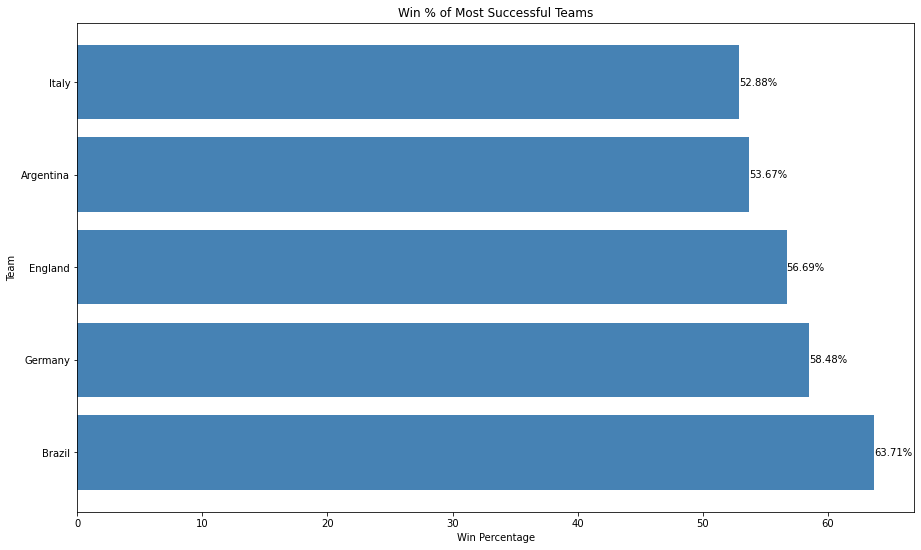

In [39]:
#Display of WIN Percentages for Successful Teams
#GRAPH FOUR:

team_names = ['Brazil', 'Germany', 'England', 'Argentina', 'Italy']
win_percentages = [63.71, 58.48, 56.69, 53.67, 52.88]

plt.figure(figsize=(15, 9))
plt.barh(team_names, win_percentages, color='steelblue')
plt.title('Win % of Most Successful Teams')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
for i, percentage in enumerate(win_percentages):
    plt.text(percentage, i, f'{percentage:.2f}%', va='center')
plt.show()

In [40]:
team_names = ['Yorkshire', 'Cascadia', 'Artsakh', 'Kernow', 'Isle of Man', 'Padania']
win_percentages = calculate_win_percentages(variable, team_names)

print("Win percentages:")
for team_name, win_percentage in win_percentages:
    print(f"{team_name}: {win_percentage:.2f}%")
    
#Showing win percentages from top average goals teams, shows the data could be misleading if not interpreted right.    

Win percentages:
Yorkshire: 71.43%
Cascadia: 57.14%
Artsakh: 54.55%
Kernow: 54.55%
Isle of Man: 59.18%
Padania: 67.44%


<span style="font-size:20px;">World Cup Analysis</span>

In [41]:
world_cup_matches = variable[variable['tournament'] == 'FIFA World Cup']
team_w = world_cup_matches['home_team'].value_counts().add(world_cup_matches['away_team'].value_counts(), fill_value=0).to_frame(name='wins')
team_w.index.name = 'team'
team_w.reset_index(inplace=True)
team_w_sorted = team_w.sort_values(by='wins', ascending=False)
most_wins = team_w_sorted.head(10)
print(most_wins)

#Shows the teams with the most wins in the World Cup competition in my DataSet.

         team   wins
28    Germany  109.0
8      Brazil  109.0
39      Italy   83.0
2   Argentina   81.0
25    England   69.0
26     France   66.0
68      Spain   63.0
44     Mexico   57.0
78    Uruguay   56.0
69     Sweden   51.0


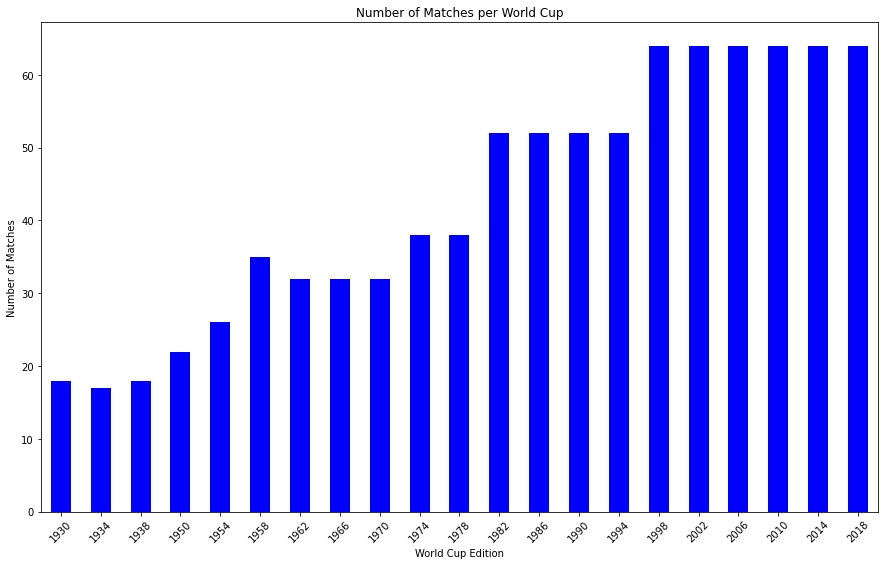

In [42]:
#How many matches were played in each iteration of the World Cup tournament?
#GRAPH FIVE:

world_cup_matches = variable[variable['tournament'] == 'FIFA World Cup'].copy()
world_cup_matches.loc[:, 'year'] = world_cup_matches['date'].dt.year.astype(str)
matches_per_world_cup = world_cup_matches['year'].value_counts().sort_index()

plt.figure(figsize=(15, 9))
matches_per_world_cup.plot(kind='bar', color='blue')
plt.title('Number of Matches per World Cup')
plt.xlabel('World Cup Edition')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

#Offers really interesting insights, number of matches at World Cups has risen dramatically since the start.

<span style="font-size:20px;">Home v Away Score Analysis</span>

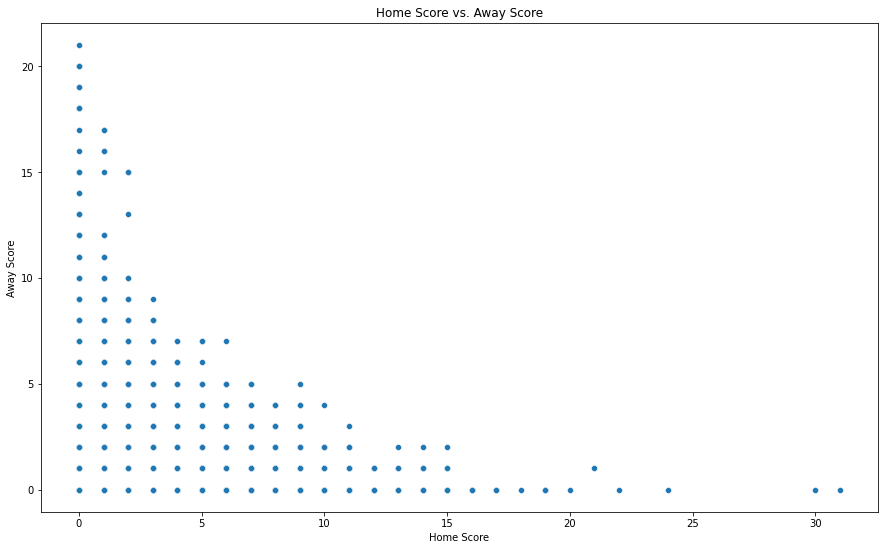

In [43]:
#Visualisation of home and away scores on a scatter plot.
#GRAPH SIX:

plt.figure(figsize=(15, 9))
sns.scatterplot(data=variable, x='home_score', y='away_score')
plt.xlabel('Home Score')
plt.ylabel('Away Score')
plt.title('Home Score vs. Away Score')
plt.show()

#The range of outcomes can be seen with clear outliers at the top of home score and some at away score.
#A relationship is clear from 5 to 5 on both axis' with a higher chance of these values.

In [44]:
home_20_goals = variable[variable['home_score'] >= 20]
home_20 = home_20_goals[['date', 'home_team', 'away_team', 'home_score', 'away_score']]
print(home_20)

#Shows the home score outliers from the scatter plot above, where home team scored 20+ goals.

            date  home_team       away_team  home_score  away_score
7902  1971-09-13     Tahiti    Cook Islands          30           0
10949 1979-08-30       Fiji        Kiribati          24           0
22567 2000-02-14     Kuwait          Bhutan          20           0
23793 2001-04-09  Australia           Tonga          22           0
23796 2001-04-11  Australia  American Samoa          31           0
28838 2006-11-24      Sápmi          Monaco          21           1


<span style="font-size:20px;">Tournament Analysis</span>

In [45]:
tournament_types = variable['tournament'].value_counts()
print(tournament_types)

#Shows some of the different tournaments in my dataset.

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
Dragon Cup                                  4
Copa América qualification                  2
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Name: tournament, Length: 112, dtype: int64


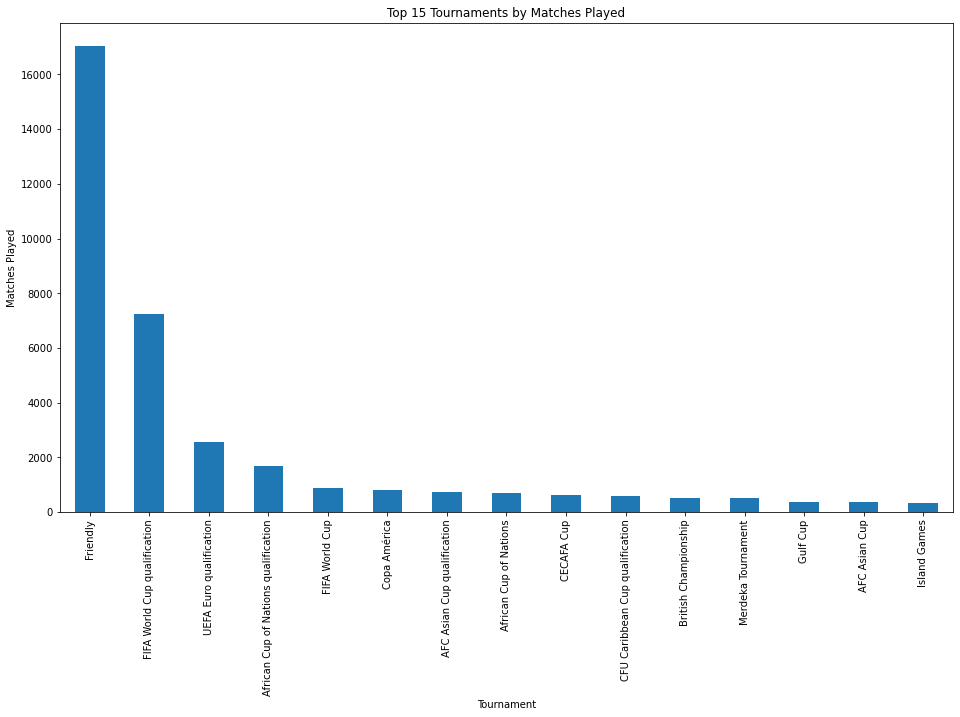

In [46]:
#Which tournament's had the most games played?
#GRAPH SEVEN:

top_tournaments = tournament_types.head(15)
plt.figure(figsize=(16, 9))
top_tournaments.plot(kind='bar')
plt.title('Top 15 Tournaments by Matches Played')
plt.xlabel('Tournament')
plt.ylabel('Matches Played')
plt.xticks(rotation=90)
plt.show()

#Friendly matches were by far the most played, with world cup qualification second due to it including all teams.

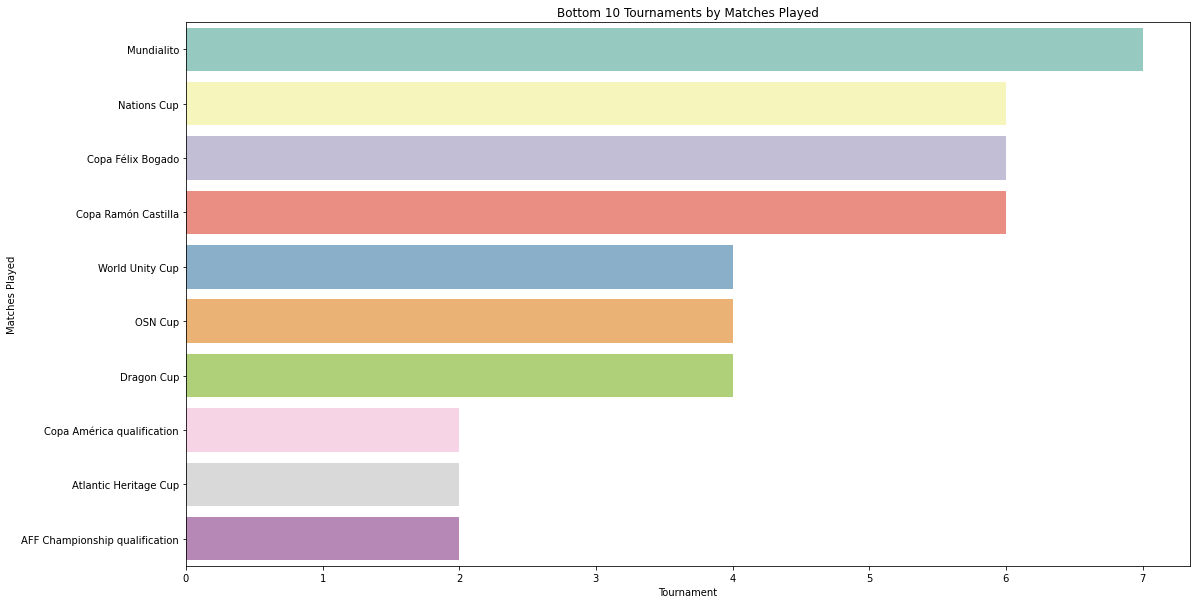

In [47]:
#Which tournament's had the least number of games played?
#GRAPH EIGHT:

bottom_tournaments = tournament_types.tail(10)
plt.figure(figsize=(18, 10))
sns.barplot(x=bottom_tournaments.values, y=bottom_tournaments.index, palette=("Set3"))
plt.title('Bottom 10 Tournaments by Matches Played')
plt.xlabel('Tournament')
plt.ylabel('Matches Played')
plt.show()

#This interesting plot informed me of tournaments I wasn't aware of before.

<span style="font-size:20px;">Retrieving Data using online APIs</span>

In [48]:
weather = requests.get('https://archive-api.open-meteo.com/v1/archive?latitude=-10.00&longitude=-55.00&start_date=2014-06-12&end_date=2014-06-25&daily=weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean&timezone=auto')

In [49]:
pd.DataFrame(weather.json())

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units,daily
time,-9.900002,-54.9,0.602007,-14400,America/Cuiaba,-04,420.0,iso8601,"[2014-06-12, 2014-06-13, 2014-06-14, 2014-06-1..."
weathercode,-9.900002,-54.9,0.602007,-14400,America/Cuiaba,-04,420.0,wmo code,"[1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 2, 0]"
temperature_2m_max,-9.900002,-54.9,0.602007,-14400,America/Cuiaba,-04,420.0,°C,"[30.9, 31.2, 31.6, 30.1, 31.3, 30.1, 30.3, 30...."
temperature_2m_min,-9.900002,-54.9,0.602007,-14400,America/Cuiaba,-04,420.0,°C,"[20.2, 20.6, 19.9, 20.8, 19.9, 19.9, 20.4, 21...."
temperature_2m_mean,-9.900002,-54.9,0.602007,-14400,America/Cuiaba,-04,420.0,°C,"[25.6, 25.5, 25.7, 25.2, 25.3, 25.0, 24.9, 25...."


In [50]:
weather_new = pd.DataFrame(weather.json()['daily'])
print(weather_new)
#This denotes the min, max and average temperatures in Brazil at the start of the 2014 World Cup.
#Weathercode states what kind of day it is: 0=Fair, 1=Mainly Clear, 2=Partly Cloudy, 3=Overcast

          time  weathercode  temperature_2m_max  temperature_2m_min  \
0   2014-06-12            1                30.9                20.2   
1   2014-06-13            1                31.2                20.6   
2   2014-06-14            1                31.6                19.9   
3   2014-06-15            2                30.1                20.8   
4   2014-06-16            1                31.3                19.9   
5   2014-06-17            2                30.1                19.9   
6   2014-06-18            3                30.3                20.4   
7   2014-06-19            2                30.5                21.4   
8   2014-06-20            1                31.9                20.7   
9   2014-06-21            1                31.7                20.6   
10  2014-06-22            1                32.4                20.6   
11  2014-06-23            1                31.9                21.2   
12  2014-06-24            2                31.4                20.3   
13  20

<span style="font-size:20px;">Merging Two DataFrames (Results & Weather) </span>

In [51]:
weather_new = pd.DataFrame(weather.json()['daily'])
weather_new = weather_new.rename(columns={'time': 'date'})
print(weather_new)

#Changing the 'time' column to 'date' to allow my DataFrames to merge.
#The newly updated 'date' column can be seen below.

          date  weathercode  temperature_2m_max  temperature_2m_min  \
0   2014-06-12            1                30.9                20.2   
1   2014-06-13            1                31.2                20.6   
2   2014-06-14            1                31.6                19.9   
3   2014-06-15            2                30.1                20.8   
4   2014-06-16            1                31.3                19.9   
5   2014-06-17            2                30.1                19.9   
6   2014-06-18            3                30.3                20.4   
7   2014-06-19            2                30.5                21.4   
8   2014-06-20            1                31.9                20.7   
9   2014-06-21            1                31.7                20.6   
10  2014-06-22            1                32.4                20.6   
11  2014-06-23            1                31.9                21.2   
12  2014-06-24            2                31.4                20.3   
13  20

In [52]:
weather_new.info()

#Looking at the data types to see if appropriate for merge, the data type for Date needs to be changed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 14 non-null     object 
 1   weathercode          14 non-null     int64  
 2   temperature_2m_max   14 non-null     float64
 3   temperature_2m_min   14 non-null     float64
 4   temperature_2m_mean  14 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 688.0+ bytes


In [53]:
weather_new['date'] = pd.to_datetime(weather_new['date'])

weather_new.info()

#Data type of Data has been changed to allow merging.
#Updated data type can be seen.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 14 non-null     datetime64[ns]
 1   weathercode          14 non-null     int64         
 2   temperature_2m_max   14 non-null     float64       
 3   temperature_2m_min   14 non-null     float64       
 4   temperature_2m_mean  14 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 688.0 bytes


In [54]:
weather_results = pd.merge(variable, weather_new, how='inner', on='date')

#Merging the two DataFrames together.

In [55]:
weather_results.head()

#Looking at the first five entries of the dataset to see successful merge.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winners,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean
0,2014-06-12,Brazil,Croatia,3,1,FIFA World Cup,São Paulo,Brazil,False,Brazil,1,30.9,20.2,25.6
1,2014-06-13,Chile,Australia,3,1,FIFA World Cup,Cuiabá,Brazil,True,Chile,1,31.2,20.6,25.5
2,2014-06-13,Mexico,Cameroon,1,0,FIFA World Cup,Natal,Brazil,True,Mexico,1,31.2,20.6,25.5
3,2014-06-13,Spain,Netherlands,1,5,FIFA World Cup,Salvador,Brazil,True,Netherlands,1,31.2,20.6,25.5
4,2014-06-14,Colombia,Greece,3,0,FIFA World Cup,Belo Horizonte,Brazil,True,Colombia,1,31.6,19.9,25.7


In [56]:
weather_results.isnull().sum()

#Ensuring that there are no missing values.

date                   0
home_team              0
away_team              0
home_score             0
away_score             0
tournament             0
city                   0
country                0
neutral                0
winners                0
weathercode            0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
dtype: int64

In [57]:
weather_results.shape

#There are 48 entries and 14 columns in the Dataset.

(48, 14)

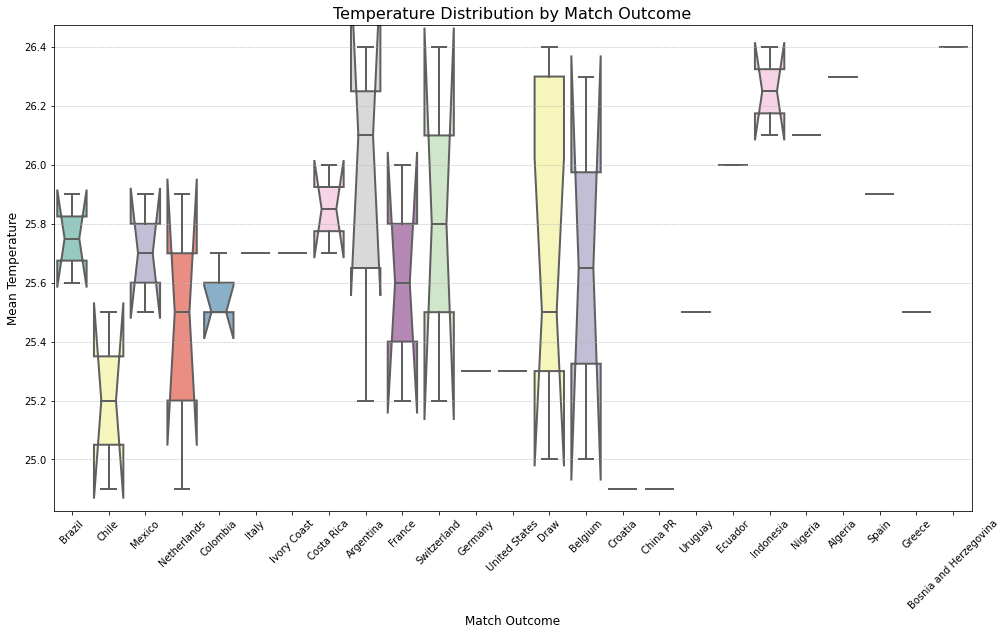

In [58]:
#Box Plot of temperature distribution by match outcome.
#GRAPH NINE:

plt.figure(figsize=(15, 9))
sns.boxplot(data=weather_results, x='winners', y='temperature_2m_mean', 
            notch=True, linewidth=2, palette='Set3')

plt.title('Temperature Distribution by Match Outcome', fontsize=16)
plt.xlabel('Match Outcome', fontsize=12)
plt.ylabel('Mean Temperature', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.95)
plt.show()

#Informative of the relationship between the mean temperature and winning teams during the World Cup.